# Import Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan
from sklearn.metrics import silhouette_score
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [113]:
df=pd.read_csv('/kaggle/input/marketing_campaign.csv', sep='\t')

# EDA

In [114]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [116]:
df.duplicated().sum()

0

In [117]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## Fill missing

In [119]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [120]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [121]:
df['Z_CostContact'].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [122]:
df['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

In [123]:
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True, errors='ignore')

In [124]:
bool_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

## Outliers

In [125]:
num_cols = list(df.select_dtypes(exclude='object').columns)

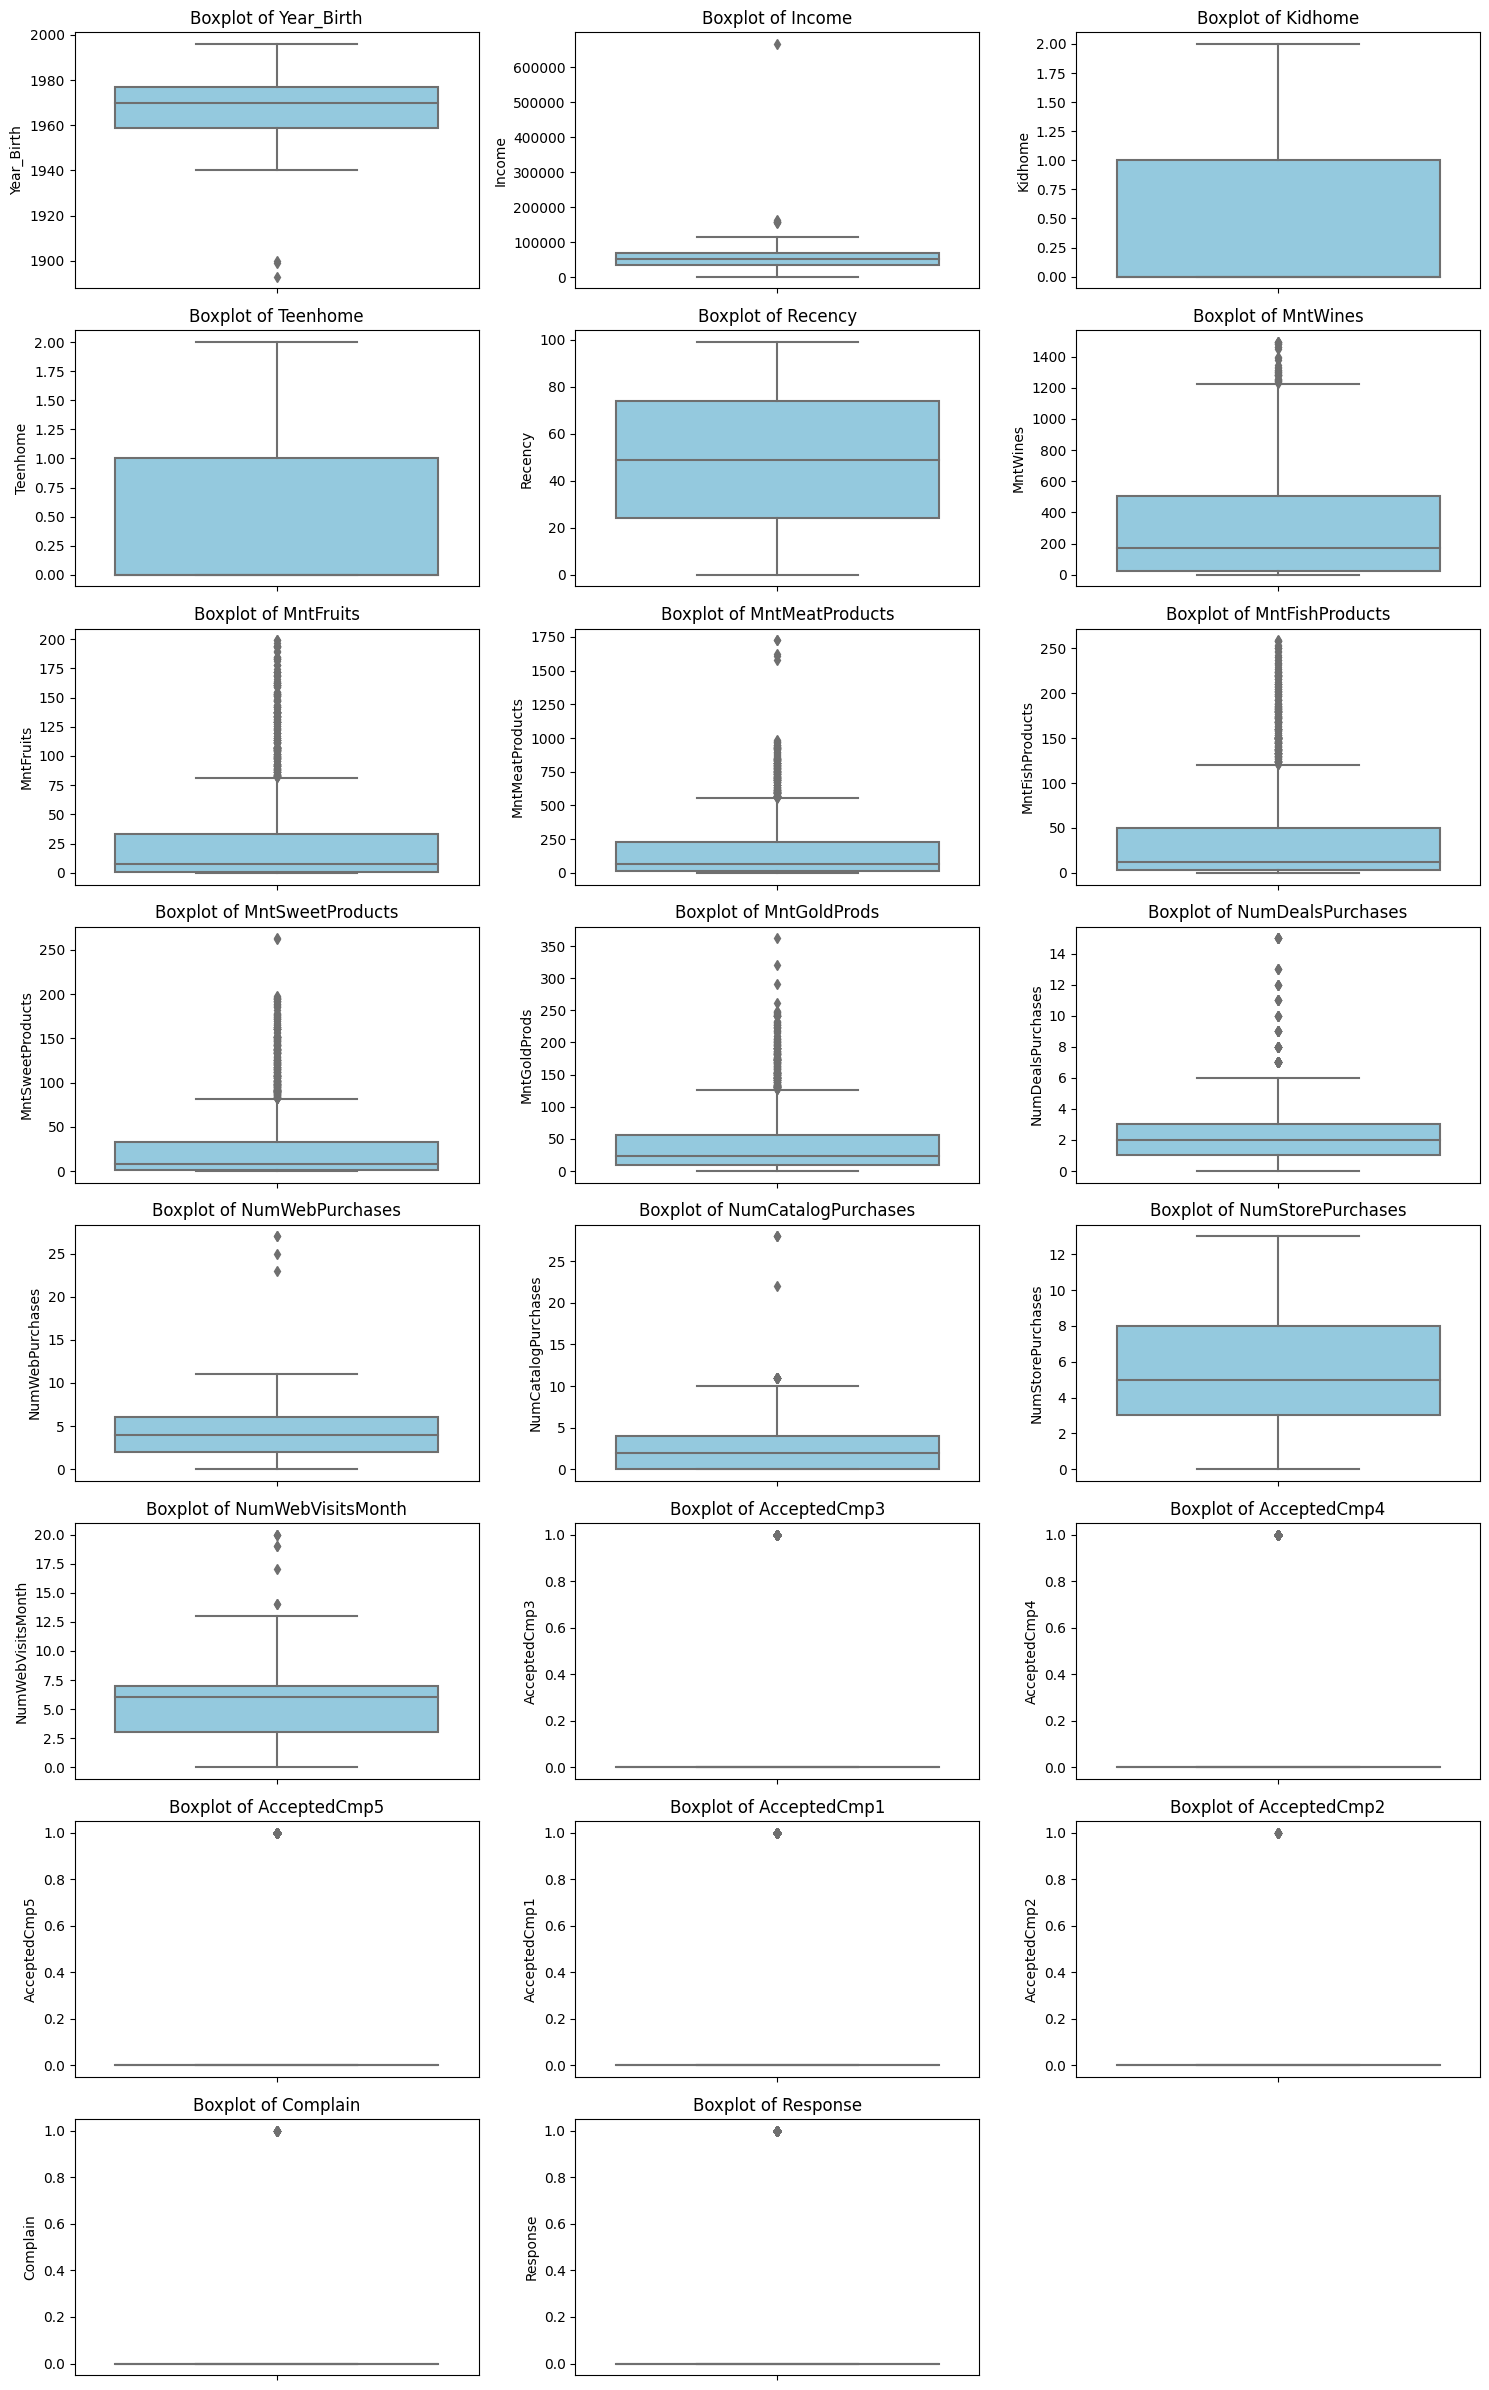

In [126]:
n = len(num_cols)

rows = (n // 3) + (n % 3 > 0)   
plt.figure(figsize=(15, rows*3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [127]:
# Remove extreme outliers
df = df[df['Income'] < 400000]

## Encode Marital_Status

In [128]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [129]:
# Encode Marital_Status as binary
df = df.replace({
    "Single":0, "Divorced":0, "Widow":0, "Alone":0, "Absurd":0, "YOLO":0,
    "Married":1, "Together":1
})

## Convert Date to Recency

In [130]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
current_date = pd.to_datetime(datetime.now().date())
df['Recency'] = (current_date - df['Dt_Customer']).dt.days

# Skewness and  scaling

In [131]:
skew_vals = df[num_cols].skew().sort_values(ascending=False)
print(skew_vals)

Complain               10.186635
AcceptedCmp2            8.470126
AcceptedCmp1            3.554472
AcceptedCmp3            3.290778
AcceptedCmp5            3.290778
AcceptedCmp4            3.240656
NumDealsPurchases       2.420120
MntSweetProducts        2.135441
MntFruits               2.101328
MntMeatProducts         2.082620
Response                1.970818
MntFishProducts         1.919063
MntGoldProds            1.885442
NumCatalogPurchases     1.880297
NumWebPurchases         1.382130
MntWines                1.175239
NumStorePurchases       0.701559
Kidhome                 0.636493
Teenhome                0.406373
Income                  0.350104
NumWebVisitsMonth       0.208258
Recency                -0.014961
Year_Birth             -0.349202
dtype: float64


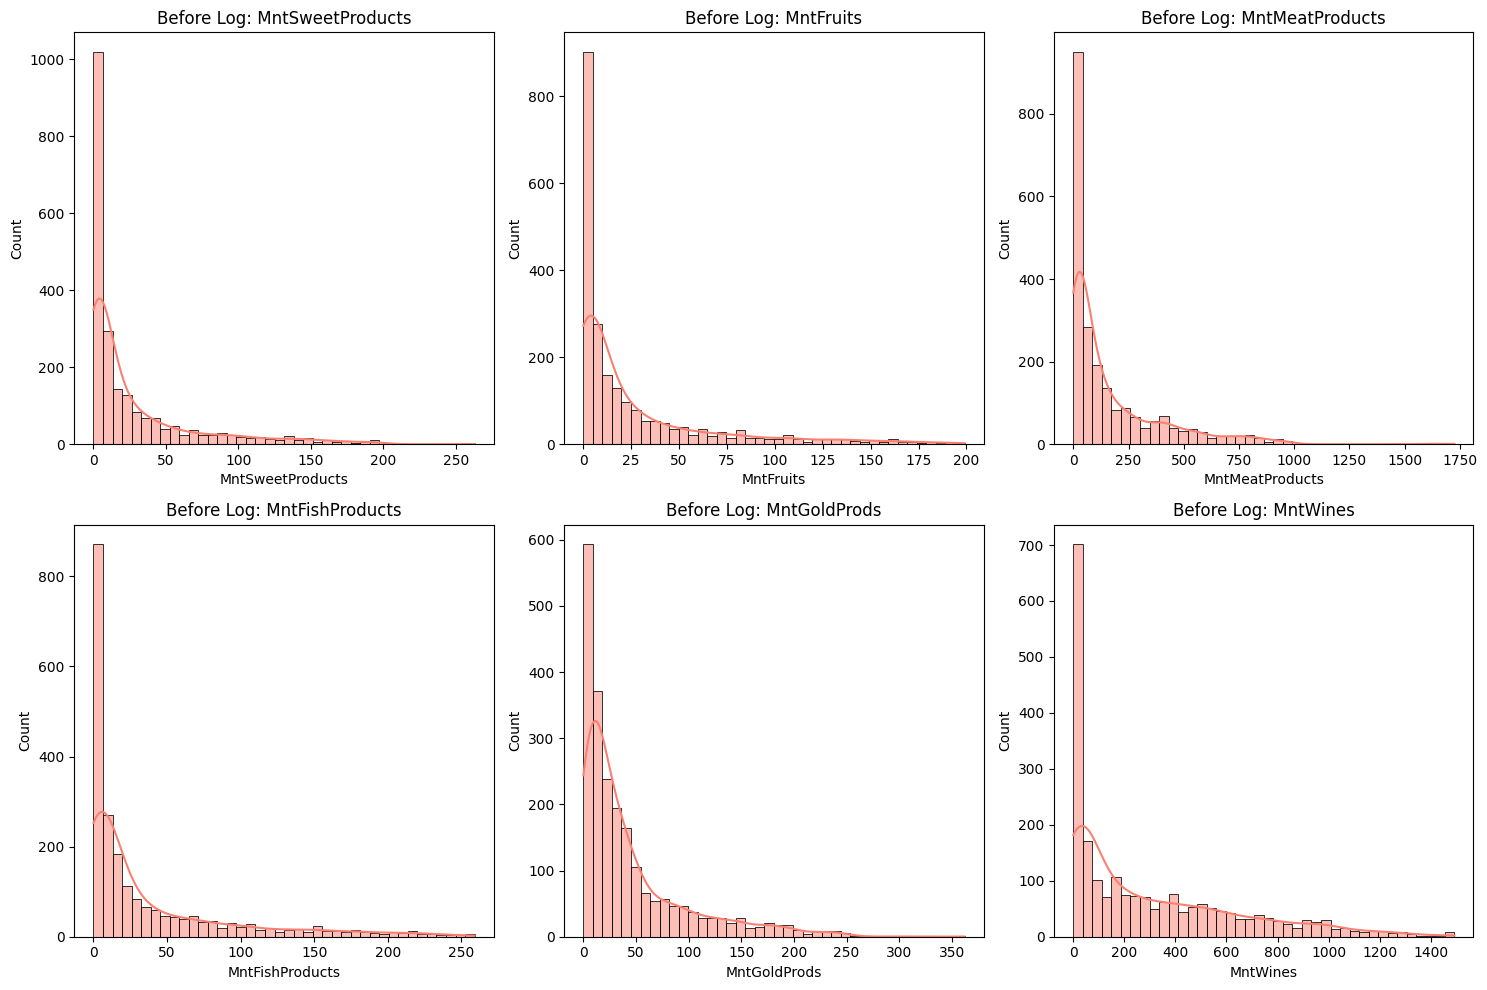

In [132]:

skewed_cols = ["MntSweetProducts","MntFruits","MntMeatProducts",
               "MntFishProducts","MntGoldProds","MntWines"]


plt.figure(figsize=(15, 10))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=40, kde=True, color="salmon")
    plt.title(f"Before Log: {col}")
plt.tight_layout()
plt.show()

In [133]:
df[skewed_cols] = np.log1p(df[skewed_cols])

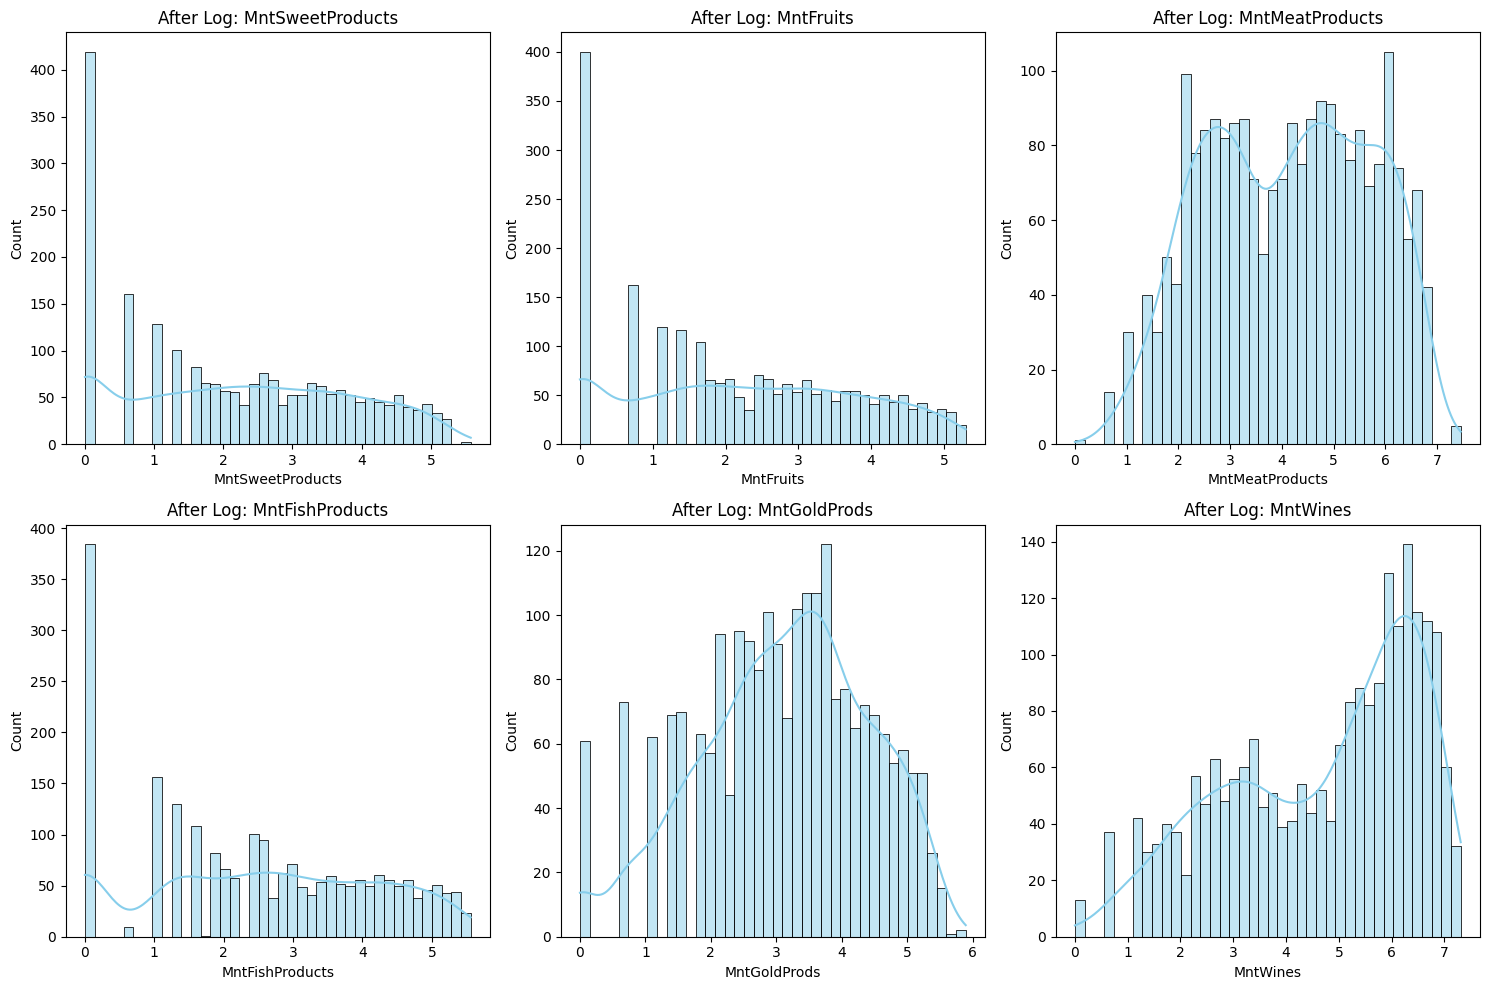

In [134]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=40, kde=True, color="skyblue")
    plt.title(f"After Log: {col}")
plt.tight_layout()
plt.show()

## Scaling

In [135]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])

# PCA

In [141]:
pca = PCA(n_components=8, whiten=True)
data_pca = pca.fit_transform(scaled)

print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance Ratios: [0.31931606 0.09337425 0.08085349 0.07258008 0.04819203 0.04389566
 0.03810219 0.037185  ]
Total Explained Variance: 0.7334987696501241


# DBSCAN

In [149]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=15)
labels = clusterer.fit_predict(data_pca)
df['Cluster'] = labels
df['Cluster'].value_counts()

Cluster
 2    2188
 1      25
 0      21
-1       5
Name: count, dtype: int64

# Cluster Profiling

In [ ]:
print(df.columns)

In [143]:
df["Spent"] = df[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]].sum(axis=1)

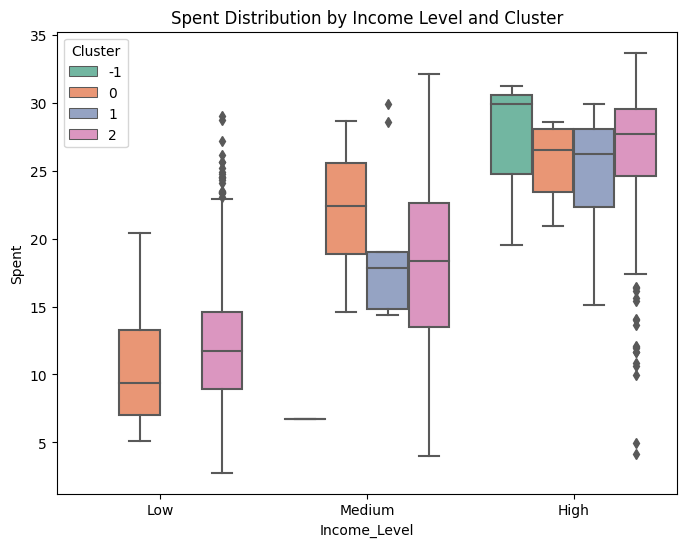

In [150]:
df["Income_Level"] = pd.qcut(df["Income"], q=3, labels=["Low","Medium","High"])

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Income_Level", y="Spent", hue="Cluster", palette="Set2")
plt.title("Spent Distribution by Income Level and Cluster")
plt.show()


`Cluster -1`
- High income, high spendings
  

`Cluster 0`	
- Medium Spenders	


`Cluster 1`
- Low Spenders


`Cluster 2`
- Budget/cautious Spenders: : Spending grows with income